In [1]:
%matplotlib inline
import pandas as pd
import keras
import numpy
import sklearn
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, auc
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense
from keras.layers.core import Dropout

Using TensorFlow backend.


In [2]:
df = pd.read_csv("creditcard.csv")
df = shuffle(df)

In [3]:
df = df.drop(["Time"], axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
84774,-4.078620,3.205694,-1.786165,-1.434787,-2.373592,-0.578623,-2.241494,3.296512,-0.216146,-0.438157,...,0.109126,-0.332338,0.358287,-0.304309,0.073656,0.781337,-0.299876,-0.100367,7.61,0
104344,1.126720,0.126060,0.836355,1.413985,-0.711269,-0.728228,-0.003950,-0.112337,0.452295,-0.184572,...,-0.232793,-0.538784,0.059949,0.694003,0.448524,-0.567716,0.037093,0.035574,29.99,0
163035,0.097816,1.013539,-0.321995,-0.630594,0.925247,-0.581911,0.892758,0.013208,-0.354344,-0.672738,...,-0.279143,-0.677547,0.094161,0.667680,-0.460366,0.085826,0.220668,0.075945,2.58,0
106290,-0.053090,-0.543237,0.894980,-2.206124,-1.486389,-0.076992,-1.857702,-2.690771,-2.109716,0.359578,...,-1.284110,0.486640,-0.254951,-0.175023,1.018289,-0.062302,0.055229,0.220650,68.00,0
116153,1.234012,0.335551,0.434732,0.773535,-0.566072,-1.269526,0.065719,-0.201683,0.071265,-0.271074,...,-0.271119,-0.802673,0.174904,0.660434,0.159156,0.075614,-0.025188,0.033175,1.29,0


In [4]:
len(df)

284807

In [5]:
train_data = df[0:int(len(df) * 0.5)]
valid_data =  df[int(len(df) * 0.5):int(len(df) * 0.75)]
test_data =  df[int(len(df) * .75):len(df)]


train_features = train_data.iloc[:,0:len(train_data.columns) - 1].as_matrix()
valid_features = valid_data.iloc[:,0:len(valid_data.columns) - 1].as_matrix()
test_features = test_data.iloc[:,0:len(test_data.columns) - 1].as_matrix()

train_labels = train_data.iloc[:, len(train_data.columns) - 1: len(train_data.columns)].as_matrix().squeeze()
valid_labels = valid_data.iloc[:, len(valid_data.columns) - 1: len(valid_data.columns)].as_matrix().squeeze()
test_labels = test_data.iloc[:, len(test_data.columns) - 1: len(test_data.columns)].as_matrix().squeeze()

print(train_features.shape)
print(valid_features.shape)
print(test_features.shape)




(142403, 29)
(71202, 29)
(71202, 29)


In [19]:
#From Training Data, create undersampled
non_fraud_data = train_data[train_data["Class"] == 0]
fraud_data = train_data[train_data["Class"] == 1]
non_fraud_sample = non_fraud_data.sample(len(fraud_data))
frames = [fraud_data, non_fraud_sample]
df = pd.concat([fraud_data,non_fraud_data])
undersampled_df = pd.concat(frames)
undersampled_df = shuffle(undersampled_df)
undersampled_features = undersampled_df.iloc[:,0:len(undersampled_df.columns) - 1].as_matrix()
undersampled_labels = undersampled_df.iloc[:, len(undersampled_df.columns) - 1: len(undersampled_df.columns)].as_matrix().squeeze()



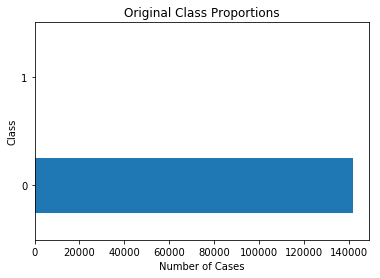

In [24]:
class_count = pd.value_counts(df['Class'], sort = True).sort_index()
class_count.plot(kind = 'barh')
plt.xlabel("Number of Cases")
plt.ylabel("Class")
plt.title("Original Class Proportions")

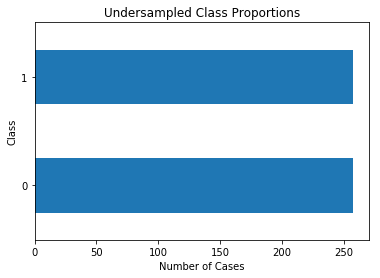

In [25]:
class_count = pd.value_counts(undersampled_df['Class'], sort = True).sort_index()
class_count.plot(kind = 'barh')
plt.xlabel("Number of Cases")
plt.ylabel("Class")
plt.title("Undersampled Class Proportions")

In [26]:
#create oversampled features and labels

In [27]:
non_fraud_data = train_data[train_data["Class"] == 0]
fraud_data = train_data[train_data["Class"] == 1]
fraud_sample = fraud_data.sample(len(non_fraud_data), replace = True)
frames = [fraud_sample, non_fraud_data]
oversampled_df = pd.concat(frames)
oversampled_df = shuffle(oversampled_df)
oversampled_features = oversampled_df.iloc[:,0:len(oversampled_df.columns) - 1].as_matrix()
oversampled_labels = oversampled_df.iloc[:, len(oversampled_df.columns) - 1: len(oversampled_df.columns)].as_matrix().squeeze()

print(len(non_fraud_data))
len(oversampled_features)





142145


284290

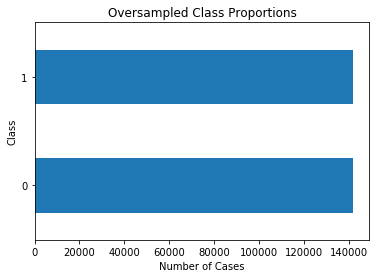

In [28]:
class_count = pd.value_counts(oversampled_df['Class'], sort = True).sort_index()

class_count.plot(kind = 'barh')
plt.xlabel("Number of Cases")
plt.ylabel("Class")
plt.title("Oversampled Class Proportions")

In [29]:
#Logistic Regression w/ Raw Data
clf = LogisticRegression(penalty="l2")
clf.fit(train_features, train_labels)
pred = clf.predict(test_features)
print("Accuracy:")
print(accuracy_score(test_labels, pred))
print("\nConfusion Matrix:")
print("[[True Positive  False Negative] \n [False Positive  True Negative]]")
print(confusion_matrix(test_labels, pred, labels=[1,0]))
print("\nArea Under Precision Recall Curve:")
lg_precision, lg_recall, _ = precision_recall_curve(test_labels, clf.decision_function(test_features))
auc(lg_recall, lg_precision)

Accuracy:
0.999227549788

Confusion Matrix:
[[True Positive  False Negative] 
 [False Positive  True Negative]]
[[   76    42]
 [   13 71071]]

Area Under Precision Recall Curve:


0.76316267797047255

In [30]:
clf = LogisticRegression(penalty="l2")
clf.fit(undersampled_features, undersampled_labels)
pred = clf.predict(test_features)
print("Accuracy:")
print(accuracy_score(test_labels, pred))
print("\nConfusion Matrix:")
print("[[True Positive  False Negative] \n [False Positive  True Negative]]")
print(confusion_matrix(test_labels, pred, labels = [1,0]))
print("\nArea Under Precision Recall Curve:")
lgu_precision, lgu_recall, _ = precision_recall_curve(test_labels, clf.decision_function(test_features))
auc(lgu_recall, lgu_precision)

Accuracy:
0.967739670234

Confusion Matrix:
[[True Positive  False Negative] 
 [False Positive  True Negative]]
[[  109     9]
 [ 2288 68796]]

Area Under Precision Recall Curve:


0.68527454812626654

In [31]:
clf = LogisticRegression(penalty="l2")
clf.fit(oversampled_features, oversampled_labels)
pred = clf.predict(test_features)
print("Accuracy:")
print(accuracy_score(test_labels, pred))
print("\nConfusion Matrix:")
print("[[True Positive  False Negative] \n [False Positive  True Negative]]")
print(confusion_matrix(test_labels, pred, labels=[1,0]))
print("\nArea Under Precision Recall Curve:")
lgo_precision, lgo_recall, _ = precision_recall_curve(test_labels, clf.decision_function(test_features))
auc(lgo_recall, lgo_precision)

Accuracy:
0.977907923935

Confusion Matrix:
[[True Positive  False Negative] 
 [False Positive  True Negative]]
[[  108    10]
 [ 1563 69521]]

Area Under Precision Recall Curve:


0.74027655813037041

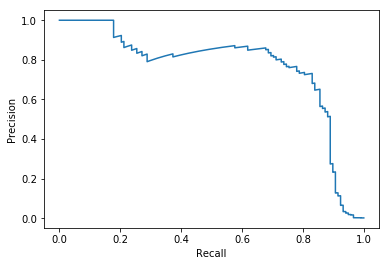

In [32]:
plt.plot(lg_recall, lg_precision)
plt.xlabel("Recall")
plt.ylabel("Precision")

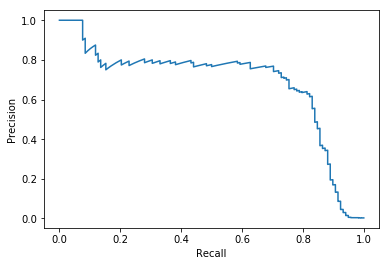

In [33]:
plt.plot(lgu_recall, lgu_precision)
plt.xlabel("Recall")
plt.ylabel("Precision")

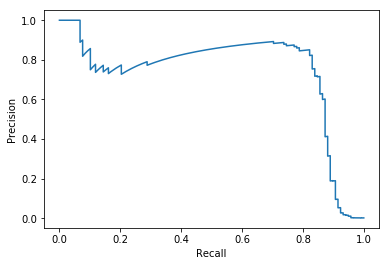

In [34]:
plt.plot(lgo_recall, lgo_precision)
plt.xlabel("Recall")
plt.ylabel("Precision")

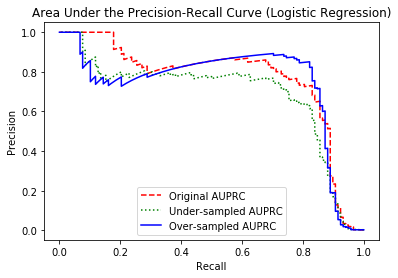

In [35]:
fig, ax = plt.subplots()
ax.plot(lg_recall, lg_precision, "r--", label= "Original AUPRC")
ax.plot(lgu_recall, lgu_precision, "g:", label= "Under-sampled AUPRC")
ax.plot(lgo_recall, lgo_precision, "b", label= "Over-sampled AUPRC")
legend = ax.legend(loc="lower center")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Area Under the Precision-Recall Curve (Logistic Regression)")

plt.show()


In [36]:
#Fully Connected Neural Network
nn_model = Sequential()
nn_model.add(Dense(29, input_shape=(29,)))
nn_model.add(Activation('relu'))
# nn_model.add(Dropout(0.25))
nn_model.add(Dense(58, input_shape=(29,)))
nn_model.add(Activation('relu'))
nn_model.add(Dropout(0.25))
nn_model.add(Dense(1))
nn_model.add(Activation('sigmoid'))

In [37]:
nn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 29)                870       
_________________________________________________________________
activation_1 (Activation)    (None, 29)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 58)                1740      
_________________________________________________________________
activation_2 (Activation)    (None, 58)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 58)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 59        
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total para

In [38]:
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
#Fit Raw Data

In [40]:
nn_model.fit(train_features, train_labels, epochs=2)

Epoch 1/2
142403/142403 [==============================] - 15s - loss: 0.0187 - acc: 0.9978    
Epoch 2/2
142403/142403 [==============================] - 14s - loss: 0.0089 - acc: 0.9991    


In [ ]:
pred1 = nn_model.predict(test_features)
pred = [round(x[0]) for x in pred1]
print("Accuracy:")
print(accuracy_score(test_labels, pred))
print("\nConfusion Matrix:")
print("[[True Positive  False Negative] \n [False Positive  True Negative]]")
print(confusion_matrix(test_labels, pred, labels = [1,0]))
print("\nArea Under Precision Recall Curve:")
precision, recall, _ = precision_recall_curve(test_labels, pred1)
print(auc(recall, precision))

In [ ]:
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(29, input_shape=(29,)))
nn_model.add(Activation('relu'))
# nn_model.add(Dropout(0.25))
nn_model.add(Dense(58, input_shape=(29,)))
nn_model.add(Activation('relu'))
nn_model.add(Dropout(0.25))
nn_model.add(Dense(1))
nn_model.add(Activation('sigmoid'))
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Fit Undersampled
nn_model.fit(undersampled_features, undersampled_labels, epochs=2)

In [ ]:
pred1 = nn_model.predict(test_features)
pred = [round(x[0]) for x in pred1]
print("Accuracy:")
print(accuracy_score(test_labels, pred))
print("\nConfusion Matrix:")
print("[[True Positive  False Negative] \n [False Positive  True Negative]]")
print(confusion_matrix(test_labels, pred, labels = [1,0]))
print("\nArea Under Precision Recall Curve:")
us_precision, us_recall, _ = precision_recall_curve(test_labels, pred1)
print(auc(us_recall, us_precision))

In [ ]:
plt.plot(us_recall, us_precision)
plt.xlabel("Recall")
plt.ylabel("Precision")

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(29, input_shape=(29,)))
nn_model.add(Activation('relu'))
# nn_model.add(Dropout(0.25))
nn_model.add(Dense(58, input_shape=(29,)))
nn_model.add(Activation('relu'))
nn_model.add(Dropout(0.25))
nn_model.add(Dense(1))
nn_model.add(Activation('sigmoid'))
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Fit Oversampled

In [ ]:
nn_model.fit(oversampled_features, oversampled_labels, epochs=5)

In [ ]:
pred1 = nn_model.predict(test_features)
pred = [round(x[0]) for x in pred1]
print("Accuracy:")
print(accuracy_score(test_labels, pred))
print("\nConfusion Matrix:")
print("[[True Positive  False Negative] \n [False Positive  True Negative]]")
print(confusion_matrix(test_labels, pred, labels = [1,0]))
print("\nArea Under Precision Recall Curve:")
os_precision, os_recall, _ = precision_recall_curve(test_labels, pred1)
print(auc(os_recall, os_precision))
pred1

In [ ]:
plt.plot(os_recall, os_precision)
plt.xlabel("Recall")
plt.ylabel("Precision")

In [ ]:
fig, ax = plt.subplots()
ax.plot(recall, precision, "r--", label= "Original AUPRC")
ax.plot(us_recall, us_precision, "g:", label= "Under-sampled AUPRC")
ax.plot(os_recall, os_precision, "b", label= "Over-sampled AUPRC")
legend = ax.legend(loc="lower center")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Area Under the Precision-Recall Curve (Neural Network)")

plt.show()


In [14]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
frst = RandomForestClassifier(n_estimators = 2, oob_score=True)

In [36]:
frst.fit(oversampled_features, oversampled_labels)

/usr/local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

Accuracy:
0.999044970647

Confusion Matrix:
[[True Positive  False Negative] 
 [False Positive  True Negative]]
[[   71    59]
 [    9 71063]]

Area Under Precision Recall Curve:
0.717241237282


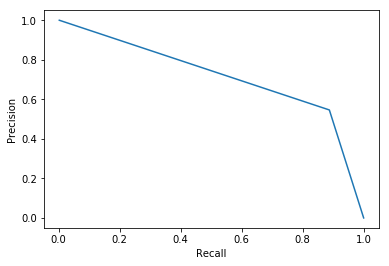

In [37]:
pred = frst.predict(valid_features)
# pred = [round(x[0]) for x in pred1]
print("Accuracy:")
print(accuracy_score(valid_labels, pred))
print("\nConfusion Matrix:")
print("[[True Positive  False Negative] \n [False Positive  True Negative]]")
print(confusion_matrix(valid_labels, pred, labels = [1,0]))
print("\nArea Under Precision Recall Curve:")
f_precision, f_recall, _ = precision_recall_curve(valid_labels, pred)
print(auc(f_recall, f_precision))
pred1
plt.plot(f_precision, f_recall)
plt.xlabel("Recall")
plt.ylabel("Precision")

In [92]:
frst.predict_proba(valid_features)

array([ 1.,  0.])

In [93]:
from sklearn.cluster import KMeans

In [94]:
clf = KMeans(n_clusters=2)

In [95]:
clf.fit(train_features, train_labels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [96]:
clf.predict(train_features)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [254]:
from sklearn.svm import LinearSVC

In [255]:
clf = LinearSVC()

In [256]:
clf.fit(train_features, train_labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Accuracy:
0.999438218028

Confusion Matrix:
[[True Positive  False Negative] 
 [False Positive  True Negative]]
[[   83    34]
 [    6 71079]]

Area Under Precision Recall Curve:
0.787640767007


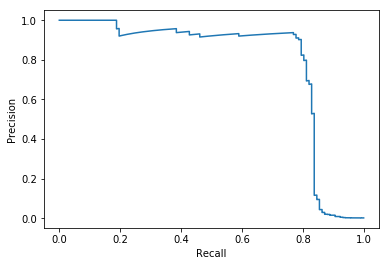

In [257]:
pred = clf.predict(test_features)
# pred = [round(x[0]) for x in pred1]
print("Accuracy:")
print(accuracy_score(test_labels, pred))
print("\nConfusion Matrix:")
print("[[True Positive  False Negative] \n [False Positive  True Negative]]")
print(confusion_matrix(test_labels, pred, labels = [1,0]))
print("\nArea Under Precision Recall Curve:")
sg_precision, sg_recall, _ = precision_recall_curve(test_labels, clf.decision_function(test_features))
print(auc(sg_recall, sg_precision))
plt.plot(sg_recall, sg_precision)
plt.xlabel("Recall")
plt.ylabel("Precision")

In [258]:
clf = LinearSVC()
clf.fit(undersampled_features,undersampled_labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Accuracy:
0.961489845791

Confusion Matrix:
[[True Positive  False Negative] 
 [False Positive  True Negative]]
[[  101    16]
 [ 2726 68359]]

Area Under Precision Recall Curve:
0.490441663313


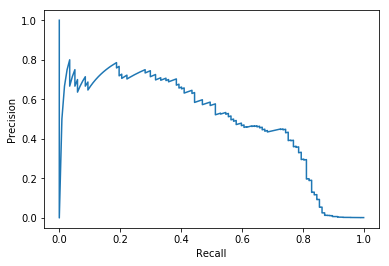

In [259]:
pred = clf.predict(test_features)
# pred = [round(x[0]) for x in pred1]
print("Accuracy:")
print(accuracy_score(test_labels, pred))
print("\nConfusion Matrix:")
print("[[True Positive  False Negative] \n [False Positive  True Negative]]")
print(confusion_matrix(test_labels, pred, labels = [1,0]))
print("\nArea Under Precision Recall Curve:")
su_precision, su_recall, _ = precision_recall_curve(test_labels, clf.decision_function(test_features))
print(auc(su_recall, su_precision))
plt.plot(su_recall, su_precision)
plt.xlabel("Recall")
plt.ylabel("Precision")


In [260]:
clf = LinearSVC()
clf.fit(oversampled_features,oversampled_labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Accuracy:
0.984059436533

Confusion Matrix:
[[True Positive  False Negative] 
 [False Positive  True Negative]]
[[   97    20]
 [ 1115 69970]]

Area Under Precision Recall Curve:
0.676273190225


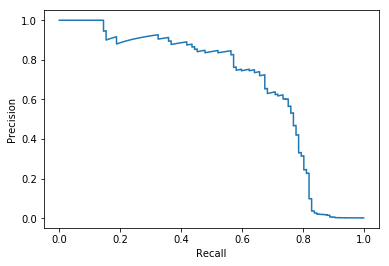

In [261]:
pred = clf.predict(test_features)
# pred = [round(x[0]) for x in pred1]
print("Accuracy:")
print(accuracy_score(test_labels, pred))
print("\nConfusion Matrix:")
print("[[True Positive  False Negative] \n [False Positive  True Negative]]")
print(confusion_matrix(test_labels, pred, labels = [1,0]))
print("\nArea Under Precision Recall Curve:")
s_precision, s_recall, _ = precision_recall_curve(test_labels, clf.decision_function(test_features))
print(auc(s_recall, s_precision))
plt.plot(s_recall, s_precision)
plt.xlabel("Recall")
plt.ylabel("Precision")

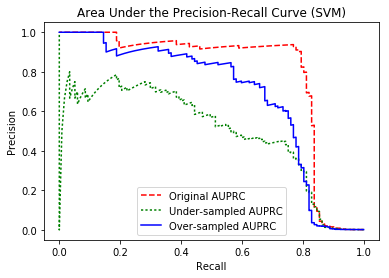

In [262]:
fig, ax = plt.subplots()
ax.plot(sg_recall, sg_precision, "r--", label= "Original AUPRC")
ax.plot(su_recall, su_precision, "g:", label= "Under-sampled AUPRC")
ax.plot(s_recall, s_precision, "b", label= "Over-sampled AUPRC")
legend = ax.legend(loc="lower center")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Area Under the Precision-Recall Curve (SVM)")

plt.show()